<a href="https://colab.research.google.com/github/ravikiran232/amex-2019/blob/main/Amex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_campaign_data=pd.read_csv("/content/campaign_data.csv")
df_demographic=pd.read_csv('/content/customer_demographics.csv')
df_trans=pd.read_csv('/content/customer_transaction_data.csv')
df_item_data=pd.read_csv('/content/item_data.csv')
df_coupon_map=pd.read_csv('/content/coupon_item_mapping.csv')


In [ ]:
print(df_train.isnull().sum())
print('---------------------------------')
print(df_campaign_data.isnull().sum())
print('---------------------------------')
print(df_demographic.isnull().sum())
print('---------------------------------')
print(df_trans.isnull().sum())
print('---------------------------------')
print(df_item_data.isnull().sum())
print('---------------------------------')
print(df_coupon_map.isnull().sum())
print('---------------------------------')

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64
---------------------------------
campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64
---------------------------------
customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64
---------------------------------
date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64
---------------------------------
item_id       0
brand         0
brand_type    0
category      0
dtype: int64
---------------------------------
coupon_id    0
item_id      0
dtype: int64
---------------------------------


checking duplicated rows

In [ ]:
print(df_train.duplicated(keep='first').sum())
print('---------------------------------')
print(df_campaign_data.duplicated(keep='first').sum())
print('---------------------------------')
print(df_demographic.duplicated(keep='first').sum())
print('---------------------------------')
print(df_trans.duplicated(keep='first').sum())
print('---------------------------------')
print(df_item_data.duplicated(keep='first').sum())
print('---------------------------------')
print(df_coupon_map.duplicated(keep='first').sum())
print('---------------------------------')

0
---------------------------------
0
---------------------------------
0
---------------------------------
2916
---------------------------------
0
---------------------------------
0
---------------------------------


removing duplicated rows

In [ ]:
df_trans.drop_duplicates(keep='first')
print(df_trans.isnull().sum())
print('---------------------------------')

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64
---------------------------------


In [ ]:
#df_demographic has most of the null values

In [ ]:
print(df_item_data['category'].unique())
print('---------------------------------')
print(df_item_data['brand_type'].unique())
print('---------------------------------')
df_item_data.head()

['Grocery' 'Miscellaneous' 'Bakery' 'Pharmaceutical' 'Packaged Meat'
 'Seafood' 'Natural Products' 'Dairy, Juices & Snacks' 'Prepared Food'
 'Skin & Hair Care' 'Meat' 'Travel' 'Flowers & Plants' 'Fuel' 'Salads'
 'Alcohol' 'Garden' 'Restauarant' 'Vegetables (cut)']
---------------------------------
['Established' 'Local']
---------------------------------


,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [ ]:
df_campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [ ]:
df_train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [ ]:
print(df_demographic.head())
print('----------------------------------')
print(df_demographic['age_range'].unique())

   customer_id age_range marital_status  rented family_size no_of_children  \
0            1       70+        Married       0           2            NaN   
1            6     46-55        Married       0           2            NaN   
2            7     26-35            NaN       0           3              1   
3            8     26-35            NaN       0           4              2   
4           10     46-55         Single       0           1            NaN   

   income_bracket  
0               4  
1               5  
2               3  
3               6  
4               5  
----------------------------------
['70+' '46-55' '26-35' '36-45' '18-25' '56-70']


In [ ]:
df_coupon_map.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [ ]:
df_trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [ ]:
print(len(df_trans['item_id'].unique()))
print(len(df_trans['customer_id'].unique()))

74063
1582


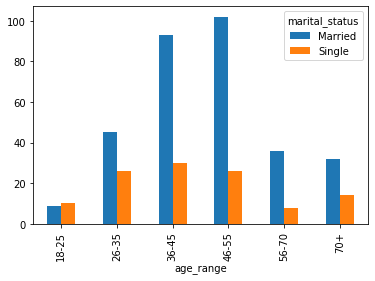

In [ ]:
pd.crosstab(df_demographic['age_range'],df_demographic['marital_status']).plot(kind='bar')

In [ ]:
df_campaign_data['start_date']=pd.to_datetime(df_campaign_data['start_date'])
df_campaign_data['end_date']=pd.to_datetime(df_campaign_data['end_date'])
df_campaign_data['total_days']=np.absolute(df_campaign_data['end_date']-df_campaign_data['start_date']).dt.days
cate_cam_type={'Y':1,'X':0}
df_campaign_data['campaign_type']=df_campaign_data['campaign_type'].map(cate_cam_type)

In [ ]:
df_campaign_data.head()

,campaign_id,campaign_type,start_date,end_date,total_days
0,24,1,2013-10-21,2013-12-20,60
1,25,1,2013-10-21,2013-11-22,32
2,20,1,2013-07-09,2013-11-16,130
3,23,1,2013-08-10,2013-11-15,97
4,21,1,2013-09-16,2013-10-18,32


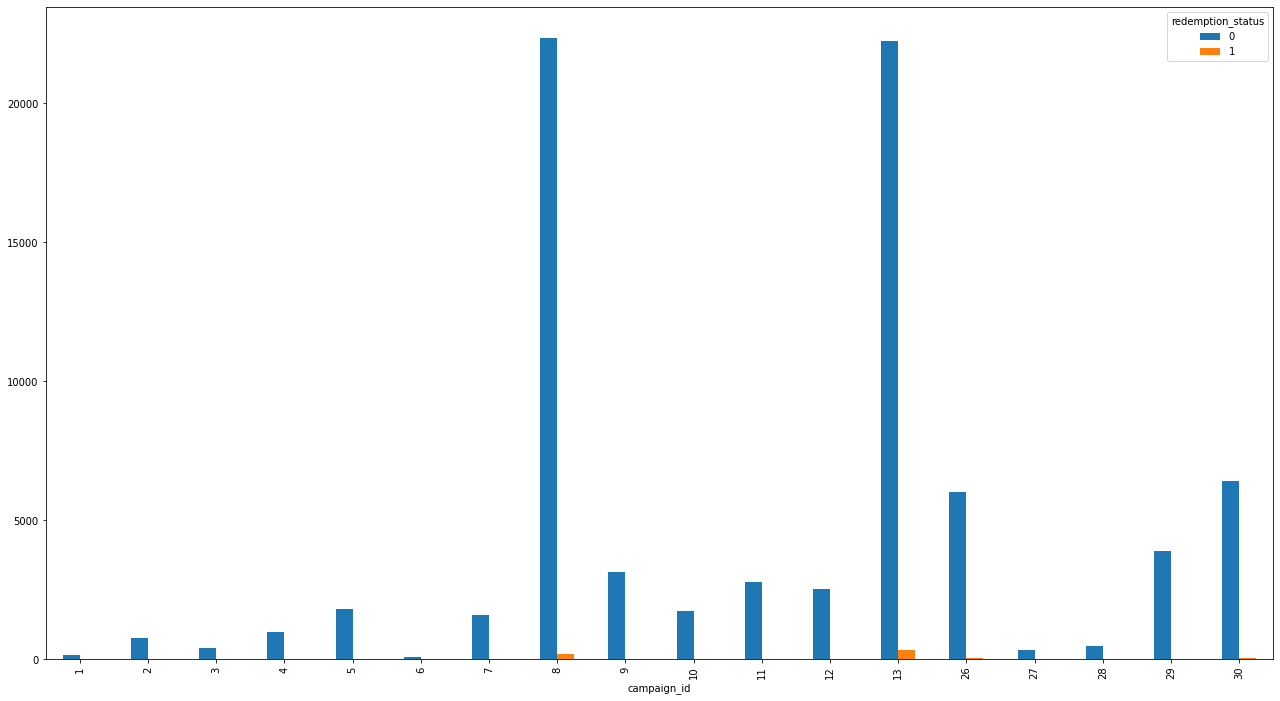

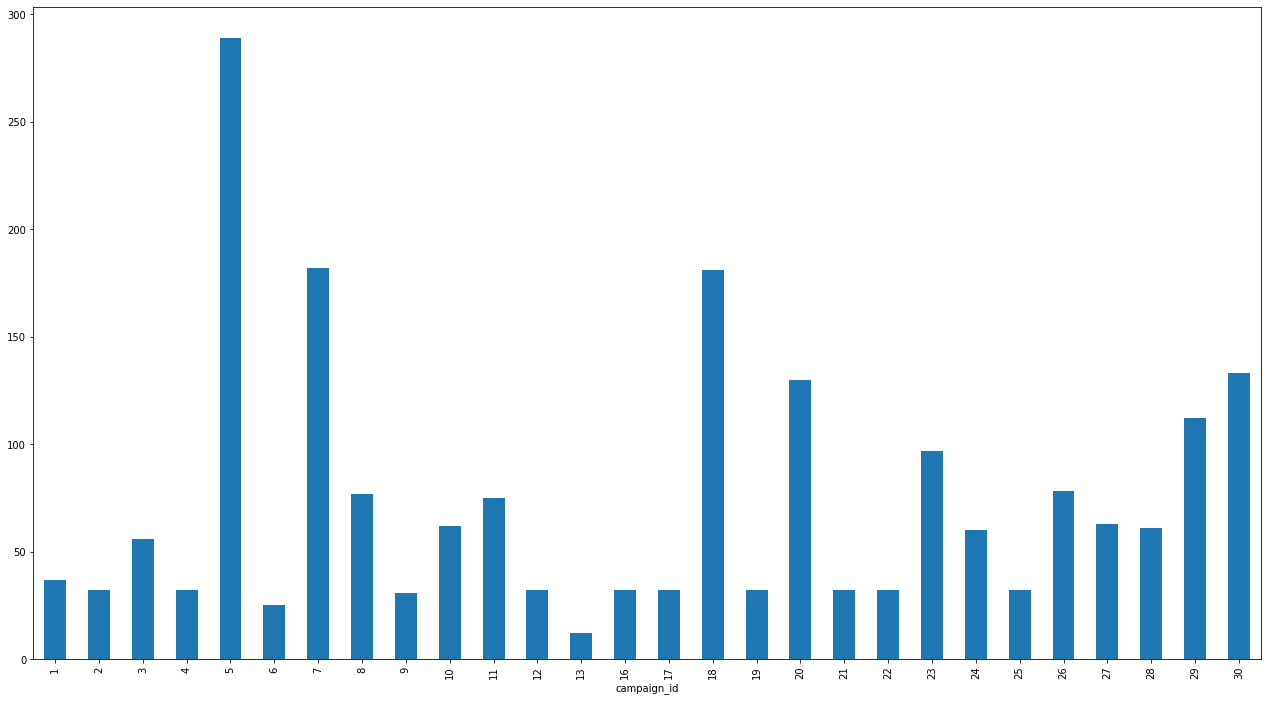

In [ ]:
pd.crosstab(df_train['campaign_id'],df_train['redemption_status']).plot(kind='bar',figsize=(22,12))
plt.show()
df_campaign_data.groupby('campaign_id').sum()['total_days'].plot(kind='bar',figsize=(22,12))
plt.show()

In [ ]:
#redumption is not certainly dependent on no.of days the compaign is running

In [ ]:
df_trans_red=df_trans[df_trans['coupon_discount']!=0]
df_trans_red['coupon_status']=1
df_trans_nred=df_trans[df_trans['coupon_discount']==0]
df_trans_nred['coupon_status']=0
print(df_trans_red.head())
print('--------------------------------')
print(df_trans_nred.head())

           date  customer_id  item_id  quantity  selling_price  \
88   2012-01-02          464     5525         1         106.50   
93   2012-01-02          464     8145         1          39.18   
104  2012-01-02          464    16381         1          48.80   
107  2012-01-02          464    17861         3          75.51   
112  2012-01-02          464    19583         2         124.67   

     other_discount  coupon_discount  coupon_status  
88           -35.62           -35.62              1  
93           -24.58           -14.25              1  
104          -14.96           -35.62              1  
107          -32.06           -26.71              1  
112          -45.59           -35.62              1  
--------------------------------
         date  customer_id  item_id  quantity  selling_price  other_discount  \
0  2012-01-02         1501    26830         1          35.26          -10.69   
1  2012-01-02         1501    54253         1          53.43          -13.89   
2  201

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
len(df_trans[df_trans['selling_price']!=0].values)

1324566

In [ ]:
df_trans['discount_percent']=((np.absolute(df_trans['coupon_discount']))/(df_trans['selling_price']))
a=df_trans_red.groupby('item_id').count()['coupon_status']
item_quantity=df_trans.groupby('item_id').sum()['quantity']
discount_percent=df_trans.groupby('item_id').mean()['discount_percent']
b=df_trans_red.groupby('customer_id').count()['coupon_status']
customer_coupon_buying=df_trans_red.groupby('customer_id').count()['coupon_status']
customer_coupon_non_buying=df_trans_nred.groupby('customer_id').count()['coupon_status']
customer_coupon_to_non_coupon_buying_ratio=customer_coupon_buying/(customer_coupon_non_buying+customer_coupon_buying)
#item_with_coupon=df_trans_red.groupby('item_id').sum()['quantity']
#item_without_coupon=df_trans_nred.groupby('item_id').sum()['quantity']
#item_with_to_without_ratio=item_with_coupon/(item_with_coupon+item_without_coupon)
#df_trans_red.head()
df_item_data['coupon_redem']=df_item_data['item_id'].map(a)
df_coupon_map['quantity']=df_coupon_map['item_id'].map(item_quantity)
df_coupon_map['discount_percent']=df_coupon_map['item_id'].map(discount_percent)
print(df_item_data.head())
print('----------------------new-------------')
print(df_item_data.info())
print('----------------------new-------------')
print(df_coupon_map.info())

   item_id  brand   brand_type       category  coupon_redem
0        1      1  Established        Grocery           NaN
1        2      1  Established  Miscellaneous           NaN
2        3     56        Local         Bakery           NaN
3        4     56        Local        Grocery           NaN
4        5     56        Local        Grocery           NaN
----------------------new-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       74066 non-null  int64  
 1   brand         74066 non-null  int64  
 2   brand_type    74066 non-null  object 
 3   category      74066 non-null  object 
 4   coupon_redem  7349 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB
None
----------------------new-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data colum

In [ ]:
df_item_data['coupon_redem'].fillna(0,inplace=True)
df_coupon_map['quantity'].fillna(0,inplace=True)
df_coupon_map['discount_percent'].fillna(0,inplace=True)
print(df_item_data.info())
print('-------------------------------')
print(df_coupon_map.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       74066 non-null  int64  
 1   brand         74066 non-null  int64  
 2   brand_type    74066 non-null  object 
 3   category      74066 non-null  object 
 4   coupon_redem  74066 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB
None
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coupon_id         92663 non-null  int64  
 1   item_id           92663 non-null  int64  
 2   quantity          92663 non-null  float64
 3   discount_percent  92663 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 2.8 MB
None


In [ ]:
df_coupon_map['coupon_red_status']=df_coupon_map['item_id'].map(a)
df_coupon_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   coupon_id          92663 non-null  int64  
 1   item_id            92663 non-null  int64  
 2   quantity           92663 non-null  float64
 3   discount_percent   92663 non-null  float64
 4   coupon_red_status  13509 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.5 MB


In [ ]:

print('---------------------------------------')
df_coupon_map['coupon_red_status'].fillna(0,inplace=True)
print(df_coupon_map.info())
print('---------------------------------------')
print(df_coupon_map.head())

---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   coupon_id          92663 non-null  int64  
 1   item_id            92663 non-null  int64  
 2   quantity           92663 non-null  float64
 3   discount_percent   92663 non-null  float64
 4   coupon_red_status  92663 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.5 MB
None
---------------------------------------
   coupon_id  item_id  quantity  discount_percent  coupon_red_status
0        105       37      16.0               0.0                0.0
1        107       75      45.0               0.0                0.0
2        494       76       1.0               0.0                0.0
3        522       77       2.0               0.0                0.0
4        518       77       2.0               0.0                0.0


In [ ]:
age_range={'70+':6, '46-55':4, '26-35':2, '36-45':3, '18-25':1, '56-70':5}
marital_status={'Married':1,'Single':2}
df_demographic['age_range']=df_demographic['age_range'].map(age_range)
df_demographic['marital_status']=df_demographic['marital_status'].map(marital_status)
df_demographic['customer_coupon_status']=df_demographic['customer_id'].map(b)
print(df_demographic.head())
print('--------------------------------------')
print(df_demographic.info())

   customer_id  age_range  marital_status  rented family_size no_of_children  \
0            1          6             1.0       0           2            NaN   
1            6          4             1.0       0           2            NaN   
2            7          2             NaN       0           3              1   
3            8          2             NaN       0           4              2   
4           10          4             2.0       0           1            NaN   

   income_bracket  customer_coupon_status  
0               4                    78.0  
1               5                    11.0  
2               3                    17.0  
3               6                   192.0  
4               5                     NaN  
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   c

In [ ]:
df_demographic['customer_coupon_status'].fillna(0,inplace=True)
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             760 non-null    int64  
 1   age_range               760 non-null    int64  
 2   marital_status          431 non-null    float64
 3   rented                  760 non-null    int64  
 4   family_size             760 non-null    object 
 5   no_of_children          222 non-null    object 
 6   income_bracket          760 non-null    int64  
 7   customer_coupon_status  760 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 47.6+ KB


In [ ]:
df_train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [ ]:
c=df_coupon_map.groupby('coupon_id').sum()['coupon_red_status']
df_train['coupon_id_red']=df_train['coupon_id'].map(c)
d=df_campaign_data.groupby('campaign_id').sum()['campaign_type']
df_train['campaign_type']=df_train['campaign_id'].map(d)
e=df_demographic.groupby('customer_id').sum()['customer_coupon_status']
df_train['customer_red_number']=df_train['customer_id'].map(b)
df_train['customer_red_number'].fillna(0,inplace=True)
f=df_coupon_map.groupby('coupon_id').sum()['quantity']
df_train['item_quantity']=df_train['coupon_id'].map(f)
g=df_coupon_map.groupby('coupon_id').mean()['discount_percent']
df_train['discount_percent']=df_train['coupon_id'].map(g)
df_train['discount_percent'].fillna(0,inplace=True)
df_train['discount_percent']=np.round_(df_train['discount_percent'],decimals=4)
map=dict(df_demographic[['customer_id','family_size']].values)
df_train['customer_coupon_usage']=df_train['customer_id'].map(customer_coupon_to_non_coupon_buying_ratio)
#df_train[customer_coupon_non_buying==0]['customer_coupon_usage'].fillna(100,inplace=True)
#df_train[customer_coupon_buying==0]['customer_coupon_usage'].fillna(0,inplace=True)
df_train['customer_coupon_usage'].fillna(0,inplace=True)
print(df_train.head())
print('-----------------------------------')
print(df_train.info())

   id  campaign_id  coupon_id  customer_id  redemption_status  coupon_id_red  \
0   1           13         27         1053                  0          191.0   
1   2           13        116           48                  0            0.0   
2   6            9        635          205                  0           15.0   
3   7           13        644         1050                  0            1.0   
4   9            8       1017         1489                  0           23.0   

   campaign_type  customer_red_number  item_quantity  discount_percent  \
0              0                  1.0         4661.0            0.0202   
1              0                 12.0           86.0            0.0000   
2              1                 85.0          202.0            0.0099   
3              0                  2.0           47.0            0.0571   
4              0                 10.0         1610.0            0.0011   

   customer_coupon_usage  item_with_to_without_ratio  
0               0.0

In [ ]:
print(len(df_train['customer_id'].unique()))
print(len(df_trans['customer_id'].unique()))
df_train['item_with_to_without_ratio']=df_train['coupon_id_red']/(df_train['coupon_id_red']+df_train['item_quantity'])

1428
1582


In [ ]:
print(np.all(np.isfinite(df_train['discount_percent'])))
print(np.all(np.isfinite(df_train['item_with_to_without_ratio'])))
print(len(df_train[df_train['discount_percent']=='inf']))
print(len(df_train[df_train['discount_percent']=='NINF']))

True
True
0
0


In [ ]:
from sklearn.metrics.pairwise import KERNEL_PARAMS
from sklearn.preprocessing import StandardScaler
preprocessing=StandardScaler()
from sklearn.model_selection import train_test_split
x=df_train.drop(['id','redemption_status','coupon_id_red','item_quantity','customer_red_number'],axis=1)
y=df_train['redemption_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=preprocessing.fit_transform(x_train)
x_test=preprocessing.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
model_rf=RandomForestClassifier()
model_svc=SVC()
model_kn=KNeighborsClassifier()
model_lr=LogisticRegression() 
model_rf.fit(x_train,y_train)
model_svc.fit(x_train,y_train)
model_kn.fit(x_train,y_train)
model_lr.fit(x_train,y_train)
print(model_rf.score(x_test,y_test)," ---",model_svc.score(x_test,y_test)," ---",model_kn.score(x_test,y_test)," ---",model_lr.score(x_test,y_test)," ---")

0.9922164093403087  --- 0.9920888094934286  --- 0.9914508102590277  --- 0.9920250095699885  ---


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
rs_lr = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
rs_lr.fit(x_train,y_train)
print(rs_lr.best_params_)
print(rs_lr.score(x_test,y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'solver': 'liblinear', 'C': 0.0001}
0.9920888094934286


In [ ]:
df_test=pd.read_csv('/content/test.csv')
df_test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [ ]:
df_test['coupon_id_red']=df_test['coupon_id'].map(c)
df_test['campaign_type']=df_test['campaign_id'].map(d)
df_test['customer_red_number']=df_test['customer_id'].map(b)
df_test['customer_red_number'].fillna(0,inplace=True)
df_test['item_quantity']=df_test['coupon_id'].map(f)
df_test['discount_percent']=df_test['coupon_id'].map(g)
df_test['customer_coupon_usage']=df_test['coupon_id'].map(customer_coupon_to_non_coupon_buying_ratio)
df_test['customer_coupon_usage'].fillna(0,inplace=True)
df_test['item_with_to_without_ratio']=df_test['coupon_id_red']/(df_test['coupon_id_red']+df_test['item_quantity'])
print(df_test.head())
print('-----------------------------------')
print(df_test.info())

   id  campaign_id  coupon_id  customer_id  coupon_id_red  campaign_type  \
0   3           22        869          967           59.0              0   
1   4           20        389         1566           36.0              1   
2   5           22        981          510          107.0              0   
3   8           25       1069          361           47.0              1   
4  10           17        498          811           84.0              1   

   customer_red_number  item_quantity  discount_percent  \
0                 81.0         4162.0          0.004285   
1                 31.0          731.0          0.012099   
2                 56.0         1495.0          0.008844   
3                  0.0         2138.0          0.008832   
4                  3.0          619.0          0.054334   

   customer_coupon_usage  item_with_to_without_ratio  
0               0.000935                    0.013978  
1               0.037398                    0.046936  
2               0.00690

In [ ]:
x_test=df_test.drop(['id','coupon_id_red','item_quantity','customer_red_number'],axis=1)
x_test=preprocessing.transform(x_test)

In [ ]:
prediction=model_rf.predict(x_test)

In [ ]:
data={'id':df_test['id'],'redemption_status':prediction}
df=pd.DataFrame(data=data)
df.to_csv('tosubmission4.csv',index=False)
df.head()

,id,redemption_status
0,3,0
1,4,0
2,5,0
3,8,0
4,10,0


In [ ]:
df[df['redemption_status']==0]

,id,redemption_status
0,3,0
1,4,0
2,5,0
3,8,0
4,10,0
...,...,...
50221,128584,0
50222,128588,0
50223,128591,0
50224,128593,0
